This dataset provides historical stock market data for Amazon (AMZN), one of the world's largest technology companies. The data has been sourced from Yahoo Finance and includes essential stock market attributes, allowing investors, analysts, and data scientists to analyze market trends, volatility, and stock performance

This dataset is useful for financial analysts, traders, researchers, and data scientists who want to:
✅ Analyze Stock Trends: Explore long-term and short-term price movements.
✅ Study Market Volatility: Understand stock fluctuations and investor sentiment.
✅ Identify Trading Patterns: Observe correlations between stock volume and price changes.
✅ Evaluate Corporate Actions: Assess the impact of dividends and stock splits.
✅ Develop Predictive Models: Use machine learning techniques to forecast stock prices.


 Amazon stock data, the term "stocks" refers to shares of ownership in a company.

A stock represents a piece of ownership in a company.

When you buy Amazon (AMZN) stock, you own a fraction of Amazon and have a right to its profits (if dividends are paid).

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the dataset
df=pd.read_csv('/content/AMZN_stock_data.csv')

Exploratory Data Analysis (EDA) is the process of analyzing, visualizing, and summarizing a dataset to understand its key characteristics before applying machine learning or statistical models. It helps in detecting patterns, anomalies, relationships, and insights within the data.

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


If a date is stored as an object (text format), Python treats it as plain text, making it difficult to analyze. Converting it to datetime format helps in easy analysis and also we canmake it index

In [ ]:
#convert date object as datetime
df["Date"] = pd.to_datetime(df["Date"])

<ipython-input-6-076e542d7f34>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


In [ ]:
#check if object became datetime successfully?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6987 non-null   object 
 1   Open          6987 non-null   float64
 2   High          6987 non-null   float64
 3   Low           6987 non-null   float64
 4   Close         6987 non-null   float64
 5   Volume        6987 non-null   int64  
 6   Dividends     6987 non-null   float64
 7   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 436.8+ KB


In [ ]:
#THIS warning has arrised because the data has a mixed time zone
#The warning means that your "Date" column contains timestamps with
#different time zones (e.g., UTC, EST, PST). In the future, Pandas will not
#allow mixed time zones unless you explicitly convert them to UTC.



UTC (Coordinated Universal Time) is the primary time standard that the world uses to regulate clocks and time. It is not affected by time zones or daylight saving time and serves as a universal reference for timekeeping.


✔ UTC = Universal time standard, no daylight saving adjustments
✔ Used to prevent confusion when working with different time zones
✔ Essential for stock market data, financial transactions, and global applications

df["Date"] = pd.to_datetime(df["Date"], utc=True)  # Convert all timestamps to UTC


In [ ]:
## Convert all timestamps to UTC
df["Date"] = pd.to_datetime(df["Date"], utc=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6987 entries, 0 to 6986
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6987 non-null   datetime64[ns, UTC]
 1   Open          6987 non-null   float64            
 2   High          6987 non-null   float64            
 3   Low           6987 non-null   float64            
 4   Close         6987 non-null   float64            
 5   Volume        6987 non-null   int64              
 6   Dividends     6987 non-null   float64            
 7   Stock Splits  6987 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 436.8 KB


now we have successfully converted obj to datetime format by UTC

In [ ]:
#SET datetime as index
df.set_index("Date", inplace=True)

In [ ]:
#display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6987 entries, 1997-05-15 04:00:00+00:00 to 2025-02-21 05:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6987 non-null   float64
 1   High          6987 non-null   float64
 2   Low           6987 non-null   float64
 3   Close         6987 non-null   float64
 4   Volume        6987 non-null   int64  
 5   Dividends     6987 non-null   float64
 6   Stock Splits  6987 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.7 KB


In [ ]:
print(df)

                                 Open        High         Low       Close  \
Date                                                                        
1997-05-15 04:00:00+00:00    0.121875    0.125000    0.096354    0.097917   
1997-05-16 04:00:00+00:00    0.098438    0.098958    0.085417    0.086458   
1997-05-19 04:00:00+00:00    0.088021    0.088542    0.081250    0.085417   
1997-05-20 04:00:00+00:00    0.086458    0.087500    0.081771    0.081771   
1997-05-21 04:00:00+00:00    0.081771    0.082292    0.068750    0.071354   
...                               ...         ...         ...         ...   
2025-02-14 05:00:00+00:00  229.199997  229.889999  227.229996  228.679993   
2025-02-18 05:00:00+00:00  228.820007  229.300003  223.720001  226.649994   
2025-02-19 05:00:00+00:00  225.520004  226.830002  223.710007  226.630005   
2025-02-20 05:00:00+00:00  224.779999  225.130005  221.809998  222.880005   
2025-02-21 05:00:00+00:00  223.279999  223.309998  214.740005  216.580002   

In [ ]:
#check for null values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [ ]:
#check summary
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6987.000000,6987.000000,6987.000000,6987.000000,6.987000e+03,6987.0,6987.000000
mean,40.692696,41.165619,40.178290,40.685061,1.360552e+08,0.0,0.003864
std,58.144182,58.787641,57.435304,58.125169,1.375735e+08,0.0,0.244286
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06,0.0,0.000000
25%,2.100250,2.148250,2.064250,2.110000,6.298900e+07,0.0,0.000000
50%,9.041500,9.158500,8.925000,9.021000,1.005360e+08,0.0,0.000000
75%,72.789249,73.643497,71.504250,73.006500,1.555070e+08,0.0,0.000000
max,239.020004,242.520004,238.029999,242.059998,2.086584e+09,0.0,20.000000


**let us see each terms in detail**

Explanation of Each Row

Count	Number of rows (i.e., 6,987 data points for each column).

Mean	The average value for each column.
Std (Standard Deviation)	Measures how spread out the data is. A higher value means more variability.

Min (Minimum Value)	The lowest recorded value in the dataset.

25% (First Quartile)	25% of the values are below this value.

50% (Median / Second Quartile)	The middle value when data is sorted.

75% (Third Quartile)	75% of the values are below this value.

Max (Maximum Value)	The highest recorded value in the dataset.

**let us understand each column in detail**

**1️⃣Open (Opening Price)**
📌 Definition:

The price at which the stock starts trading when the market opens.

Example: If Amazon’s stock opened at 100 dollars then this means that first trade of the day heppened at 100 dollars

📌 Why It Matters?

Helps compare with previous day's close to see overnight market sentiment.

Gap up/down: If today’s open is much higher/lower than yesterday’s close, it indicates news or investor reactions.



**High (Highest Price of the Day)**
📌 Definition:

The maximum price the stock reached during that day.

Example: If Amazon opened at $100 and peaked at 105 dollar, the high for the day is 105 dollar.

📌 Why It Matters?

Shows the strongest buying pressure of the day.

Important for traders looking for breakouts.



**Low (Lowest Price of the Day)**
📌 Definition:

The minimum price at which the stock traded during that day.

Example: If Amazon traded as low as 98 dollar that day, the low price is 98 dollar.

📌 Why It Matters?

Indicates selling pressure or fear in the market.

Used to analyze stock volatility.

 **Close (Closing Price)**
📌 Definition:

The last price at which the stock was traded before the market closed.

Example: If Amazon ended the day at 102 dollar, then Close = 102 dollar.

📌 Why It Matters?

Most important price for investors and analysts.

Used to calculate daily price changes and trends.

** Volume (Number of Shares Traded)**
📌 Definition:

The total number of shares bought and sold during the day.

Example: If Amazon had a trading volume of 10 million shares, it means 10 million shares were exchanged that day.

📌 Why It Matters?

High volume = More market activity & liquidity.

Price moves with high volume are considered more reliable.

 Dividends (Profit Sharing) – Some companies pay dividends (Amazon does not)
 (Company Payouts to Shareholders)
 A portion of company profits paid to shareholders (usually in cash).

Example: If Amazon paid $2 per share as dividends, then for 10 shares, you'd receive $20.

📌 Why It Matters?

Amazon does not pay dividends (value = 0 in your dataset).

Dividend-paying stocks are good for long-term investors seeking stable income.



Stock Splits (Company Adjusting Share Price)
📌 Definition:

When a company splits existing shares into multiple shares to make stock more affordable.

Example: If Amazon does a 2-for-1 split, then:

If you had 1 share at $2000, it becomes 2 shares at $1000 each.

📌 Why It Matters?

Affects number of shares but NOT the company’s total value.

Can attract more investors by reducing stock price.

Stock splits do not affect total investment value, but they change the number of shares you own.

In [ ]:
#checking for any missing values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


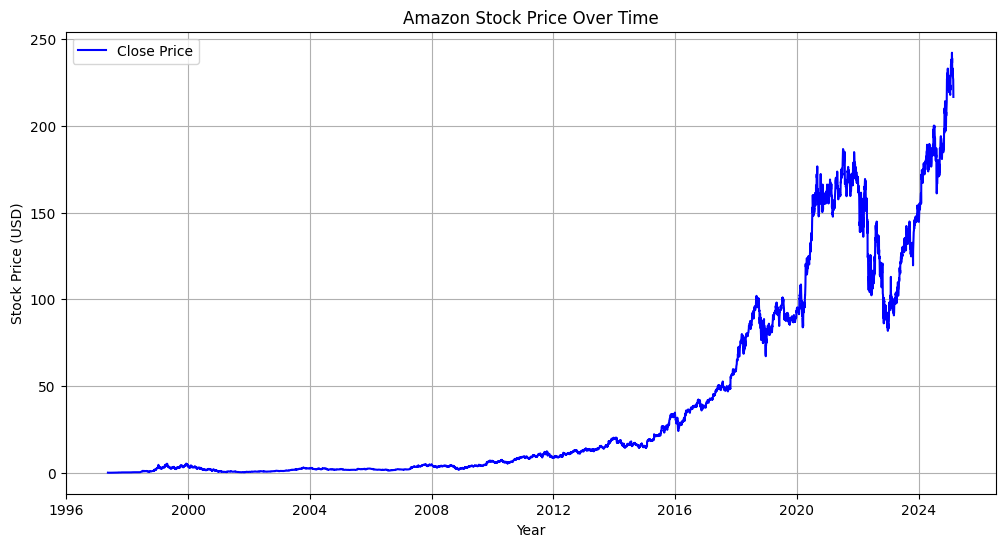

In [ ]:
# Plot Stock Price Trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")#
plt.title("Amazon Stock Price Over Time")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.legend()# legend box in Matplotlib is a small box that appears inside a plot to
#label different lines, markers, or data series. It helps the viewer understand what each color or line represents.
plt.grid(True) #Enables grid lines to make reading values easier.
plt.show()#display the final plot

**A Moving Average (MA) smooths out price data to identify trends by calculating the average closing price over a specified period.**

In [ ]:
# Moving Averages (50-day & 200-day)
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["SMA_200"] = df["Close"].rolling(window=200).mean()

**Bollinger Bands are a technical indicator used in stock analysis to measure volatility (how much the stock price moves up and down).**



In [ ]:
# Bollinger Bands
df["Rolling_Mean"] = df["Close"].rolling(window=20).mean()# This calculates the average closing price over the past 20 days.

df["Rolling_STD"] = df["Close"].rolling(window=20).std()#This calculates the standard deviation
# (how much the stock price fluctuates) over the past 20 days.

df["Upper_Band"] = df["Rolling_Mean"] + (df["Rolling_STD"] * 2) #The Upper Band is placed 2 standard deviations above the rolling mean.
# If the stock price touches this band, it may be overbought (price is too high).

df["Lower_Band"] = df["Rolling_Mean"] - (df["Rolling_STD"] * 2) #The Lower Band is placed 2 standard deviations below the rolling mean.
#If the stock price touches this band, it may be oversold (price is too low).

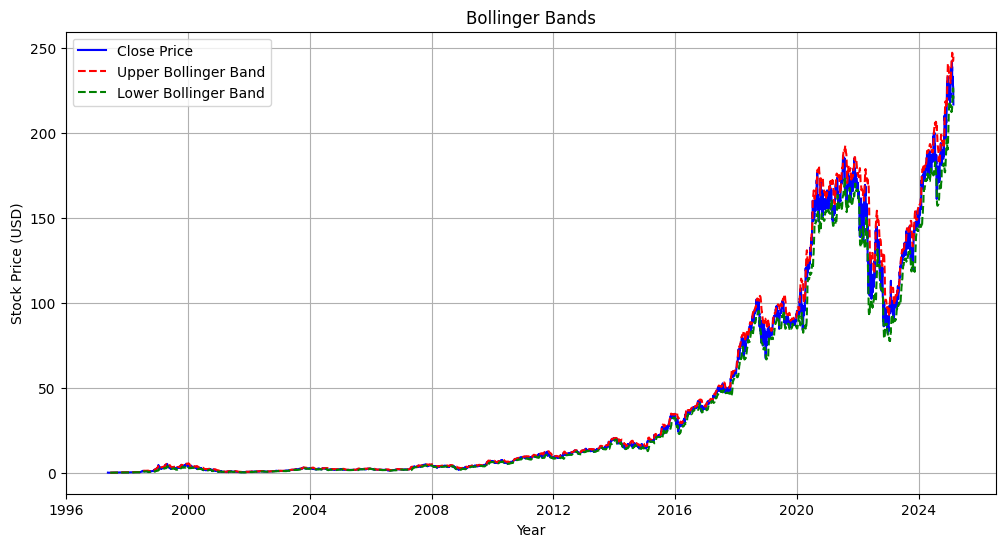

In [ ]:
# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")
plt.plot(df.index, df["Upper_Band"], label="Upper Bollinger Band", linestyle="dashed", color="red")
plt.plot(df.index, df["Lower_Band"], label="Lower Bollinger Band", linestyle="dashed", color="green")
plt.title("Bollinger Bands")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

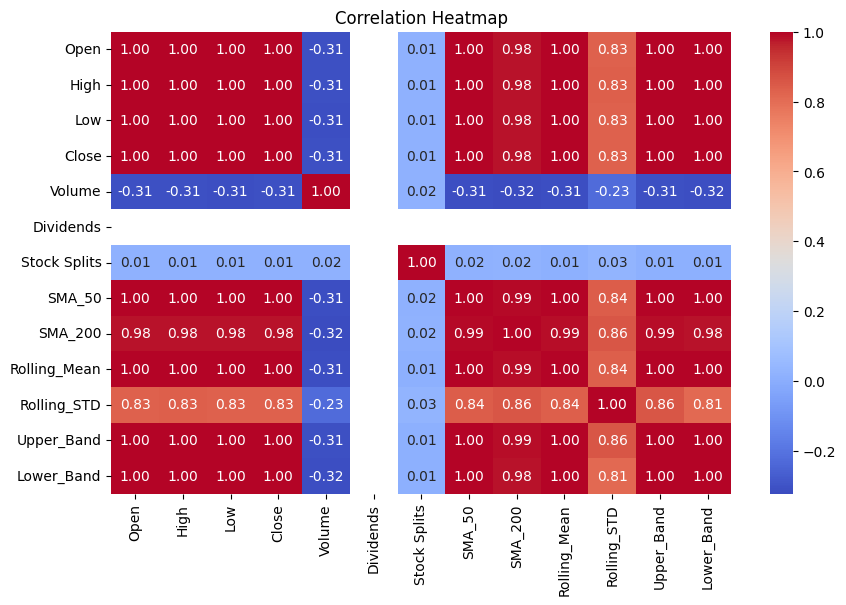

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f") #Displays correlation values inside the heatmap. cmap Uses a color scheme
#fmt=".2f" → Formats the values to 2 decimal places. annot=True → Displays correlation values inside the heatmap.
plt.title("Correlation Heatmap")
plt.show()

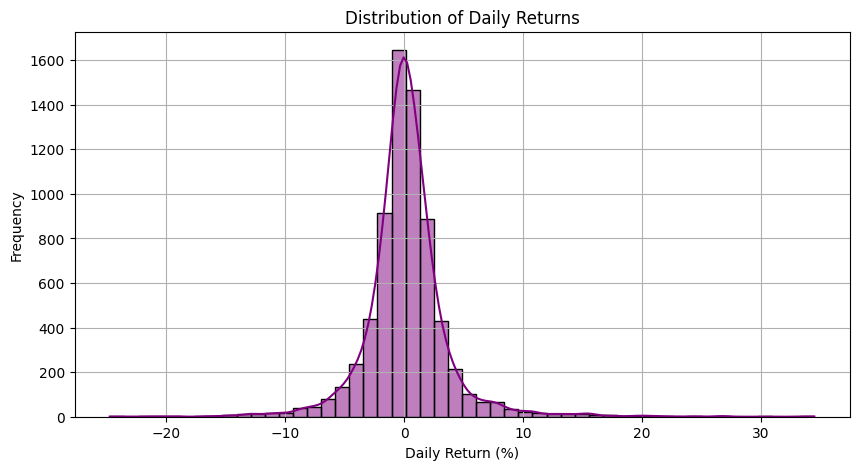

In [ ]:
# Daily Returns Distribution
df["Daily_Return"] = df["Close"].pct_change() * 100
# .pct_change() → Calculates percentage change between consecutive closing prices.it is a pandas function.
# * 100 → Converts it to a percentage.

plt.figure(figsize=(10, 5))
sns.histplot(df["Daily_Return"].dropna(), bins=50, kde=True, color="purple")
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
#sns.histplot() → Plots a histogram of daily returns.
#df["Daily_Return"].dropna() → Drops NaN values (since the first value will be NaN).
# bins=50 → Divides data into 50 bins for a detailed view.
# kde=True → Adds a smooth density curve (Kernel Density Estimate).
# color="purple" → Sets the color of the bars.

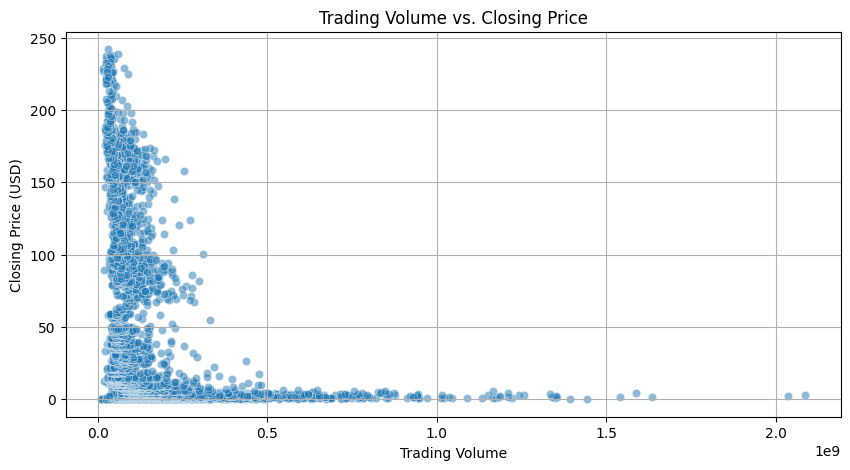

In [ ]:

# Scatter Plot: Volume vs. Closing Price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Volume"], y=df["Close"], alpha=0.5)
plt.title("Trading Volume vs. Closing Price")
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.show()


In [ ]:
# Display the dataset with new features
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,Rolling_Mean,Rolling_STD,Upper_Band,Lower_Band,Daily_Return
Date,,,,,,,,,,,,,,
2025-02-14 05:00:00+00:00,229.199997,229.889999,227.229996,228.679993,27031100,0.0,0.0,227.864799,197.15505,234.119998,4.101067,242.322132,225.917864,-0.733604
2025-02-18 05:00:00+00:00,228.820007,229.300003,223.720001,226.649994,42975100,0.0,0.0,228.128999,197.41330,234.155498,4.028972,242.213442,226.097554,-0.887703
2025-02-19 05:00:00+00:00,225.520004,226.830002,223.710007,226.630005,28566700,0.0,0.0,228.298399,197.65145,233.951498,4.306354,242.564206,225.338790,-0.008819
2025-02-20 05:00:00+00:00,224.779999,225.130005,221.809998,222.880005,30001700,0.0,0.0,228.344999,197.84225,233.344998,4.954794,243.254587,223.435410,-1.654679
2025-02-21 05:00:00+00:00,223.279999,223.309998,214.740005,216.580002,55161000,0.0,0.0,228.135999,197.99410,232.402998,6.179175,244.761349,220.044648,-2.826634
